#Cuarto Taller Métodos Númericos


---


**Autor**: Carlos Andrés Rodallega Millán

**Código**: 2071142


**Programa**: Física - 3146

**Curso**: Métodos Númericos - (111366M)


**Presentado a**: Miguel Angel Vargas Valencia

**Fecha de entrega:** 29/07/2022

In [ ]:
#Librerias a usar en este Taller.
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer
import pandas as pd
from sympy.matrices import *
import sympy as sym
from tabulate import tabulate

##Punto 1: Regresión Lineal
---
Dado los siguientes datos:
\begin{table}[]
\begin{tabular}{|c|l|l|l|l|l|l|l|l|l|l|}
\hline
\textbf{x} & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\ \hline
y & \multicolumn{1}{c|}{6.5} & 12.8 & 32.6 & 70.5 & 130.2 & 212.6 & ? & 489.5 & 764.6 & 998.7 \\ \hline
\end{tabular}
\end{table}
**a**:
Construya la matriz A y el vector c, de modo que pueda encontrar la pendiente m y el corte con el eje b de la linea recta se ajusta a los datos, mediante la solución del sistema:
$$
\textbf{A} \left( \begin{matrix}
m\\
b
\end{matrix} \right) = c$$

**b**:
Dado que el el sistema anterior no tiene solución, solucione el problema de
minimización
$$min||Az-c||^2 $$
para encontrar $z = (m, b)$ de la pendiente y corte con el eje de la linea recta que mejor se ajusta a los datos (Realice el cálculo con la expresión que se concluyó en clase, mediante el uso de herramientas de numpy para el cálculo de matriz transpuesta e inversa).

**c**:
Calcule el error cuadrático de la Regresión Lineal obtenida.

**d**:
Utilice la regresión lineal para estimar el valor de y en x = 7.



###Sobre la teoria.



---

Primero debemos identificar las diferencias entre las aproximaciones y la interpolación.

**Interpolar**:Realizar que la curva pasen por todos los puntos de los datos.
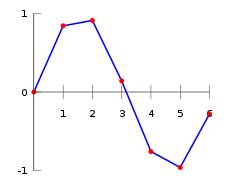

**Aproximación**: Realizar una curva que mejor se aproxime a una función que modela los datos, no necesariamente deben coincidir en los puntos.

**Interpolación**
Definición formal:
Dado un conjunto de datos conocidos (nodos):
$$(x_0,y_0),(x_1,y_1),...,(x_n,y_n)$$
Buscamos una función $f:𝑅→𝑅 $ que satisfaga:
$$f(x_i)=y_i, \quad i=0,1,...,n $$
f es la función interpolante o interpolador.


Las funciones interpoladoras pueden ser las funciones del tipo:

*   Polinomios
*   Funciones trigonométricas
*   Funciones exponenciales
*   Funciones racionales

Dado un conjunto discretos de puntos $\{(x_0,f(x_0)),(x_1,f(x_1)),...,(x_n,f(x_n))\}$.
Construimos una función $f(x)$ que pase por $(x_i,f(x_i))$ por medio de la aproximación:
$$f(x)=\sum_{i=0}^{n}\alpha_iΦ_i(x)  $$
donde $Φ_i=0,...,n$ son funciones conocidos a priori y forman una base. Vemos que expresamos nuestra función como una combinación linea de funcione bases $Φ_i$.

Desarrollando lo anterior, obtenemos un sistema de ecuaciones lineales, donde los coeficientes coinciden con las bases:
$$\sum_{k=0}^{n}\alpha_kΦ_k(x_k)=f(x_j), \quad i=0,...,m $$
donde, para $i=0,....,m$ y $f=0,...,n$
$$Φ_k=y,\quad Φ_{kj}\quad y \quad y_i=f(x_j) $$

**Observación:** Para este curso se realizaran interpolaciones polinomiales y la cantidad de datos será igual a la cantidad de funciónes que vamos a determinar.

Sobre la cantidad de datos:


*   Si $m>n$, es incompatible y habría que resolverlo mediante técnicas de mínimos cuadrados.
*   Si $m<$n tendrá muchas soluciones y habrá que considerar alguna de ellas por el criterio que sea adecuado.
*   Si $m=n$ se puede determinar una única solución.

**Aplicaciones:**

*   En forma conceptual permite obtener información a partir de puntos discretos.

*   Permite cambiar una función que sea más dura, engorrosa, por una más sencilla y que tenga la facilidad de trabajo.

*   Determinar valores intermedios de una tabla de datos.
*   Derivar e integrar a partir de una tabla de datos.


#### Ejemplo desarrollando lo anterior:

In [ ]:
xi = np.array([2,4,5])
yi = np.array([5,6,3])

In [ ]:
#Función matrix de coeficientes.
def MatrixCoef(xi):
  n=len(xi)
  D =np.zeros(shape=(n,n), dtype=float)
  for i in range(0,n,1):
    for j in range(0,n,1):
      potencia =(n-1)-j
      D[i,j]=xi[i]**potencia
  return D

In [ ]:
M=MatrixCoef(xi)

In [ ]:
M

array([[ 4.,  2.,  1.],
       [16.,  4.,  1.],
       [25.,  5.,  1.]])

In [ ]:
#Resolver el sistema, hallando los coeficientes
coeficientes = np.linalg.solve(M,yi)

In [ ]:
coeficientes

array([-1.16666667,  7.5       , -5.33333333])

In [ ]:
#definición de polinomio
def poli(coef):
  n=len(coef)
  x = sym.Symbol('x')
  polinomio = 0
  for i in range(0,n,1):
    potencia =(n-1)-i
    termino = coef[i]*(x**potencia)
    polinomio = polinomio + termino
  return polinomio, x


In [ ]:
# Siguiente con el código. Tratando la función polinomio, evaluando la función anterior
polinomio,x = poli(coeficientes)


In [ ]:
polinomio

-1.16666666666667*x**2 + 7.50000000000001*x - 5.33333333333335

In [ ]:
px = sym.lambdify(x,polinomio)

In [ ]:
#Colocando las condiciones inciciales para graficar nuestro polinomio
muestras=120

a = np.min(xi)
b = np.max(xi)

xin = np.linspace(a,b,muestras)
yin = px(xin)

In [ ]:
#Impresión de resultados
print('Matrix Vondermonde: ')
print(M)
print('Polinomio de interpolación: ')
sym.pprint(polinomio)

Matrix Vondermonde: 
[[ 4.  2.  1.]
 [16.  4.  1.]
 [25.  5.  1.]]
Polinomio de interpolación: 
                    2                                        
- 1.16666666666667⋅x  + 7.50000000000001⋅x - 5.33333333333335


Text(0.5, 1.0, 'Polinomio')

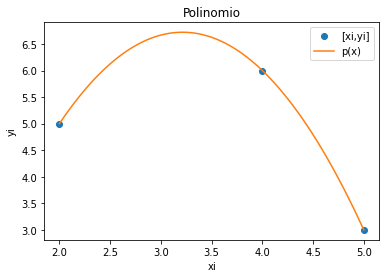

In [ ]:
#Gráfica
plt.plot(xi,yi,'o',label='[xi,yi]')
plt.plot(xin,yin, label='p(x)')
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.title('Polinomio')

###Solución Punto a



In [ ]:
A= np.array([[1,1],[2,1], [3,1], [4,1], [5,1], [6,1], [8,1], [9,1],[10,1]])
c= np.array([6.5,12.8,32.6, 70.5, 130.2, 212.6, 489.5, 764.6,998.7])

###Solución Punto b

Para hallar el error cuadratico medio lo asumimos como la diferencia entre el valor real y el valor que hemos calculado, después desarrollamos esto de manera análitica:
$$ f(z)= (Az-c)(Az-c)\\
⇒f(z)=  (Az-c)^T \cdot (Az-c)\\
⇒f(z)=[(Az)^T-c^T]\cdot (Az-c)\\
⇒f(z)=[z^TA^T - c^T] \cdot (Az-c)\\
⇒f(z)= z^TA^T Az - z^TA^T c -c^T Az + c^2    $$


Como buscamos minimizar esta cantidad encontrada, lo que hacemos es derivar esta función respecto a cero e igualamos a cero:

$$ f'(z)= 2A^T Az - 2 A^T c =0 \\
⇒ A^T Az = A^T c \\
⇒ z= (A^T A)^{-1}(A^T c )$$

Ahora, ya podemos colocar de manera explicita en nuestro programa el error cuadratico medio gracias a las funciones de numpy.

In [ ]:
#Calculando lo anterior mencionado.
A_T = A.T
M= np.dot(A_T, A)
M_1= np.linalg.inv(M)
N= np.dot(A_T,c)
z= np.dot(M_1, N)

In [ ]:
#Imprimimos los resultados
print("m= ", z[0], " b= ", z[1])

m=  107.83624999999998  b=  -273.1266666666668


### Solución Punto c.


Justo en la sección anterior habíamos notado que la
$$ f(z)=  (Az-c)^T \cdot (Az-c) $$

In [ ]:
e_1=(np.dot(A,z)-c).T
e_2= np.dot(A,z)-c
error= np.dot(e_1, e_2)

In [ ]:
#print("El error cuadrático de la regresión es ", error)

### Solución Punto d

Ahora solo definimos una función con los valores anteriormente obtenidos y la evaluamos en los puntos pedidos.

In [ ]:
def f(x,z):
  return x*z[0]+z[1]

print("El valor aproximado de la función en x= 7 es ",f(7,z))

El valor aproximado de la función en x= 7 es  481.7270833333331


##Punto 2: Regresión polinómica.
---
Dados los datos del ejercicio 1:

**a**:
Construya la matriz A y el vector c, de modo que pueda encontrar los coecientes del polinomio de grado tres $p(x) = ax3 + bx2 + cx + d$ que se ajusta a los datos, mediante la solución del sistema:
$$
\textbf{A} \left( \begin{matrix}
a\\
b\\
c\\
d
\end{matrix} \right) = \textbf{c}$$

**b**:
Dado que el el sistema anterior no tiene solución, solucione el problema de
minimización
$$min||Az-c||^2 $$
para encontrar $z = (a, b, c, d)$ del polinomio de grado 3 que mejor se ajus-
ta a los datos (Realice el cálculo con la expresión que se concluyó en clase, mediante el uso de herramientas de numpy para el cálculo de matriz transpuesta e inversa). Presente las expresiones a calcular en latex y expliquelas.

**c**:
Calcule el error cuadrático de la Regresión Polinómica de grado 3.

**d**:
Utilice la Regresión Polinómica de grado 3 para estimar el valor de y en
x = 7.














###Solución Punto a.




In [ ]:
A2= np.array([[1,1,1,1],[8, 4, 2,1], [27, 9,3,1], [64, 16, 4,1], [125, 25, 5,1], [216, 36, 6,1], [512, 64, 8,1], [729, 81, 9,1],[1000, 100, 10,1]])

### Solución Punto b.
Realizamos un procedimiento similar al realizado en el punto 1.

In [ ]:
A2_T = A2.T
M2= np.dot(A2_T, A2)
M2_1= np.linalg.inv(M2)
N2= np.dot(A2_T,c)
z2= np.dot(M2_1, N2)

In [ ]:
print("a=",z2[0], "b=",z2[1], "c=",z2[2], "d=",z2[3])

a= 1.1177763838320516 b= -1.566118437829573 c= 4.707134624608443 d= 2.266341299196938


### Solución Punto c.





Dado que las ecuaciones son invariantes al grado de la matriz  con la que estamos trabajando, se tiene que el error sigue dada por:
$$ f(z)=  (Az-c)^T \cdot (Az-c) $$

In [ ]:
e2_1=(np.dot(A2,z2)-c).T
e2_2= np.dot(A2,z2)-c
error2= np.dot(e2_1, e2_2)

print("El error cuadrático de la regresión es ", error2)

El error cuadrático de la regresión es  1701.547801270871


### Solución Punto d.


---
Todas los errores absolutos fueron guardados en listas.


In [ ]:
def f2(x,z):
  return z[0]*x**3 + z[1]*x**2 + z[2]*x + z[3]

print("El valor aproximado de la función en x= 7 es ",f2(7,z2))

El valor aproximado de la función en x= 7 es  341.87377987220066


##Punto 3: Polinomio de Lagrange.
**a**:
Presente una breve explicación teórica de la construcción del Polinomio de
Lagrange y determine el grado del polinomio para los datos del ejercicio 1.

**b**:
Desarrolle un código que implemente el ajuste del Polinomio de Lagrange
para los datos del ejercicio 1, como una función de python. 
**c**:
Utilice la función del inciso anterior para estimar el valor de y en x = 7.


### Sobre la Teoria.
**Interpolación de Lagrange:**
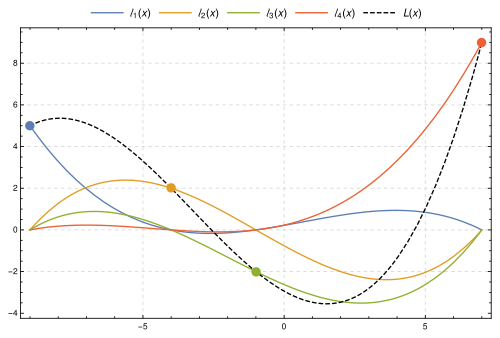

$f_1(x)=a_1(x-x_1)+a_0(x-x_0)$
Sustituyendo $x=x_0$:
$$f(x_0)=a_1(x_0-x_1)$$
Dejando:
$$ a_1=\frac{f(x_0)}{(x_0-x_1)}$$
Ahora, sustityendo $x=x_1$ en la primera ecuación:
$$f(x_1)=a_0(x_1-x_0) $$
Dejando:
$$a_0=\frac{f(x_1)}{(x_1-x_0)} $$

Y reemplazando los coeficientes obtenidos en la primera ecuación:

$$f_1(x)=\frac{f(x_0)}{(x_0-x_1)}(x-x_1)+\frac{f(x_1)}{(x_1-x_0)}(x-x_0)$$

Reordenando:

$$f_1(x)=\frac{(x-x_1)}{(x_0-x_1)}f(x_0)+\frac{(x-x_0)}{(x_1-x_0)}f(x_1) $$

Donde $L_o(x)$ y $L_1(x)$, son los coeficientes de Lagrange.

$$L_0(x)=\frac{(x-x_1)}{(x_0-x_1)} $$

$$L_1(x)=\frac{(x-x_0)}{(x_1-x_0)} $$

Por lo tanto, la función polinomica de lagrange de grado 1, queda:

$$f_1(x)=L_0(x)f(x_0)+L_1(x)f(x_1) $$

Ahora, de forma generica un polinomio de lagrange se puede escribir como:
$$f_n(x)=\sum_{i=0}^{n}L_i(x)*f(x_i)$$
Donde los lagrangianos se definen de la siguiente manera:
$$L_i(x)=\prod_{i=0,i\ne j}^{n}\frac{(x-x_j)}{(x_i-x_j)}  $$

Que también son las bases de los mismos polinomios.




#### Ejemplo desarrollando lo anterior.

**Ejemplo**: Calcular el polinomio interpolador de Lagrange basándose en la siguiente tabla de datos:
xi = 2,3,-1,4

f(x_i) = 1,2,3,4


In [ ]:
#Escritura en pandas de lo anterior, para que sea más estetico.
import pandas as pd
dicSol={
    "f(x_1)=1":"x1=2",
    "f(x_2)=2":"x2=3",
    "f(x_3)=3":"x3=-1",
    "f(x_4)=4":"x4=4",
}

In [ ]:
dSols=pd.DataFrame.from_dict(dicSol,orient='index', columns=["Solución"])

In [ ]:
dSols

Tendremos un polinomio de la siguiente manera:

$$P_3(x)=L_0(x)y_0+L_1(x)y_1+L_2(x)y_2+L_3(x)y_3$$

In [ ]:
#Datos
xi = np.array([2,3,-1,4])
yi = np.array([1,2,3,4])

n =len(xi)

In [ ]:
#Función que permite calular los terminos L_i
def Lagrange(xi):
  n =len(xi)
  x = sym.Symbol('x')
  polinomio = 0
  terminoLi=[]
  for i in range(0,n,1):
    N =1
    D= 1
    for j in range(0,n,1):
      if (j!=i):
        N = N*(x-xi[j])
        D = D*(xi[i]-xi[j])
    terminoLi1 = N/D
    terminoLi.append(terminoLi1)
    #print('l{0} ={1}'.format(i,terminoLi))
    polinomio = polinomio+terminoLi1*yi[i]
  return terminoLi, polinomio

In [ ]:
#Probando función
terminos, poli = Lagrange(xi)

In [ ]:
poli

-(x - 4)*(x - 3)*(x - 2)/20 + (x - 4)*(x - 3)*(x + 1)/6 - (x - 4)*(x - 2)*(x + 1)/2 + 2*(x - 3)*(x - 2)*(x + 1)/5

In [ ]:
terminos

[(x - 4)*(x - 3)*(x + 1)/6,
 -(x - 4)*(x - 2)*(x + 1)/4,
 -(x - 4)*(x - 3)*(x - 2)/60,
 (x - 3)*(x - 2)*(x + 1)/10]

In [ ]:
# Preparación para datos.
pol = poli.expand()
px = sym.lambdify(x,pol)
muestras = 101

a = np.min(xi)
b = np.max(xi)

pxin = np.linspace(a,b,muestras)
pyin = px(pxin)


In [ ]:
#Imprimir datos.
print('Valores de fi', yi)
print('Polinomio de Lagrange')
sym.pprint(poli)
print()
print('Polinomio de Lagrange Simplificado:')
sym.pprint(pol)

Valores de fi [1 2 3 4]
Polinomio de Lagrange
  (x - 4)⋅(x - 3)⋅(x - 2)   (x - 4)⋅(x - 3)⋅(x + 1)   (x - 4)⋅(x - 2)⋅(x + 1) 
- ─────────────────────── + ─────────────────────── - ─────────────────────── 
             20                        6                         2            

  2⋅(x - 3)⋅(x - 2)⋅(x + 1)
+ ─────────────────────────
              5            

Polinomio de Lagrange Simplificado:
 3      2           
x    7⋅x    16⋅x   8
── + ──── - ──── + ─
60    20     15    5


Text(0.5, 1.0, 'Polinomio')

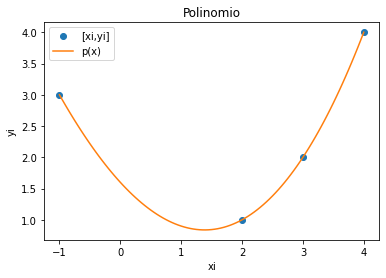

In [ ]:
#Graficación de los datos.
#Gráfica
plt.plot(xi,yi,'o',label='[xi,yi]')
plt.plot(pxin,pyin, label='p(x)')
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.title('Polinomio')

### Solución Punto a.

---
El desarrollo teorico de esto, se raelizo anteriormente.

###Solución Punto b.


---




In [ ]:
def lagrange (x,Lisx, Lisy):
  L=np.zeros(len(Lisx))
  L=L.tolist()
  for i in range (len(Lisx)):
    p=1
    for j in range (len(Lisx)):
      if j != i:
        p= p*(x-Lisx[j])/(Lisx[i]- Lisx[j])
      else:
        continue
    L[i]= p

  sum=0
  for o in range (len(Lisx)):
    sum += Lisy[o]*L[o]
  return sum

###Solución Punto c.
---



In [ ]:
d=[[1,6.5],[2,12.8],[3,32.6],[4,70.5],[5,130.2],[6,212.6],[8,489.5],[9,764.6],[10,998.7]]


x= []
y= []
for i in range(9):
  x.append(d[i][0])
  y.append(d[i][1])

print("El valor aproximado de la función en x= 7 es ", lagrange(7, x, y) )

El valor aproximado de la función en x= 7 es  321.17619047619047


##Punto 4: Spline cúbica.
---

**a**:
Presente una breve explicación teórica de la construcción de la Spline cubica
con las condiciones naturales vistas en clase.

**b**:
Utilice el siguiente código para calcular las segundas derivadas de la Spline
cubica que ajusta los datos del ejercicio 1, donde X es un array con los
datos de x y Y es un array con los datos de y:
```
import numpy a s np
A=np . z e r o s ( [ n , n ] )
A[ 0 ] [ 0 ] = 1
A[ n=1][ n=1]=1
for i in range ( 1 , n=1) :
A[ i ] [ i =1]=X[ i ]=X[ i =1]
A[ i ] [ i ]=2*(X[ i +1]=X[ i =1])
A[ i ] [ i +1]=X[ i +1]=X[ i ]
b=np . z e r o s ( n )
for i in range ( 1 , n=1) :
b [ i ]=6*(Y[ i +1]=Y[ i ] ) / (X[ i +1]=X[ i ] ) +6*(Y[ i =1]=Y[ i
] ) / (X[ i ]=X[ i =1])

Segundas_Derivadas=np . l i n a l g . s o l v e (A, b )
```

**c**:
Desarrolle un código que implemente el ajuste de la Spline cúbica para los datos del ejercicio 1, como una función de python. Si desea puede utilizar el siguiente código, donde x (minúscula) es la variable:


```
Trazadores_cubicos =[]
for i in range ( 1 , n ) :
Termino1=(Segundas_Derivadas [ i =1]*(X[ i ]=x ) * *3 )
/ ( 6*(X[ i ]=X[ i =1]) )
Termino2=(Segundas_Derivadas [ i ] * ( x=X[ i =1]) * *3 )
/ ( 6*(X[ i ]=X[ i =1]) )
Termino3=(Y[ i =1]/(X[ i ]=X[ i =1]) =
Segundas_Derivadas [ i =1]*(X[ i ]=X[ i =1]) / 6 ) *(X[ i
]=x )
Termino4=(Y[ i ] / (X[ i ]=X[ i =1]) = Segundas_Derivadas
[ i ] * (X[ i ]=X[ i =1]) / 6 ) *( x=X[ i =1])
T r az ad o re s_cubic o s . append ( Termino1+Termino2+
Termino3+Termino4 )
```

**d**:
Utilice la función del inciso anterior para estimar el valor de y en x = 7.






### Solución Punto a.
---
Buen día profesor, este fue el punto que le comenté que tenía dudas, para este punto no entendí bien personamente el desarrollo teorico y no lo realicé personalmente así como los he presentado en los otros puntos. Sin embargo, pedí colaboración de un compañero de clase y a continuación, parafrasearé su explicación en base a lo que yo entendí.


Para cada dos puntos de datos, haremos pasar un polinomio cúbico, debemos entender que la concavidad es importante en estos temas. Coinciden la 2da y la 1ra derivada en ese punto.

Un espline es una función polinomial definida a trozos:
$$S:[a.b]→ℜ $$
donde cada trozo es un polinomio
$$S_i:[x_i,x_{x+1}>→ℜ] $$
y $a=x_0x_1x_2...x_{n+a}x_n= b$ con lo cual queda definido de la siguiente manera:

$  S(x) = 
  \left \{
    \begin{aligned}
      2x+1 &,\ \text{si} \ x < 1\\
      x+2 &,\ \text{si} \ 1 \le x \le 10 \\
      2^x-1 &,\ \text{si} \ x > 10
    \end{aligned}
  \right .$

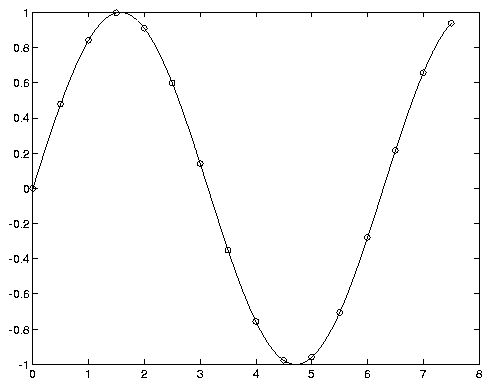

Con este método, de los splines cúbicos, lo que se quiere realizar es la unión de cada pareja de puntos junto a cada polinomio de grado 3.Para cada uno de estos polinomios se tienen 4 incognitas (los coeficientes de cada $x^{i}$, con $i= [0,1,2,3]$), por lo que al haber $\textit{n}$ parejas ordenadas, habrán $\textit{n-1}$ polinomios y por tanto $\textit{4(n-1)}$ incognitas a resolver.

Se sabe que cada polinomio debe pasar por dos puntos, así hay $\textit{2(n-1)}$ ecuaciones. Tambien se sabe que para una curva suave, en cada punto (excepto el primero y el ultimo) se debe cumplir que la derivada del polinomio $P_i$ al ser evaluada en $x_i$, debe tener un valor igual que cuando se evalúa en $x_{i-1}$, lo mismo para el caso de las segundas derivadas- Así, de aquí se extraen $\textit{2(n-2)}$ ecuaciones. 

Hasta aquí se tienen  $\textit{4(n-1)}=  \textit{4n-4}$ incognitas y  $\textit{4n-6}$ ecuaciones. Por tanto, para poder resolver el sistema se necestan 2 ecuaciones más.

Estas dos ecuaciones extra son aquellas dadas por la segunda derivada en los puntos extremos, pero el valor que se les de, depende del tipo de problema con el que se trabaja. En nuestro caso se usarán las $\textit{condiciones naturales}$, las cuales dicen que la segunda derivada en los extremos es 0.

###Solución Punto b.

---
Código dado por el docente.


In [ ]:
n=9
X= x
Y= y
A3=np. zeros ([9,9]) 
A3[0][0]=1 
A3[n-1][n-1]=1 
for i in range(1,n-1): 
  A3[ i ][ i-1]=X[ i]-X[ i -1] 
  A3[ i ][ i ]= 2*(X[ i+1] - X[ i -1]) 
  A3[ i ][ i+1]=X[ i+1] - X[ i ] 
  
b=np. zeros (n) 
for i in range(1,n-1): 
  b[ i ]=6*(Y[ i+1]-Y[ i ]) /(X[ i+1]- X[ i ]) + 6*(Y[ i-1]-Y[ i ] ) /(X[ i]-X[ i -1]) 
  
Segundas_Derivadas=np. linalg . solve (A3,b)

### Solución Punto c
Código dado por el docente.

In [ ]:
def splines(x, X, Y, Segundas_Derivadas, n):
  Trazadores_cubicos=[] 
  for i in range(1,n): 
    if x>= X[i-1] and x<= X[i]:
      Termino1=(Segundas_Derivadas [ i -1]*(X[ i]- x)**3) /(6*(X[ i]-X[ i -1])) 
      Termino2=(Segundas_Derivadas [ i ]*(x - X[ i - 1])**3) /(6*(X[ i]- X[ i -1])) 
      Termino3=(Y[ i - 1]/(X[ i] - X[ i -1]) - Segundas_Derivadas [ i -1]*(X[ i]- X[ i -1])/6)*(X[ i ]-x) 
      Termino4=(Y[ i ]/(X[ i]-X[ i -1]) - Segundas_Derivadas [ i ]*(X[ i]-X[ i -1])/6)*(x-X[ i -1]) 
      return Termino1+Termino2+ Termino3+Termino4
  

###Solución Punto d.

In [ ]:
print("El valor aproximado de la función en x= 7 es ", splines(7, X, Y, Segundas_Derivadas, n))

El valor aproximado de la función en x= 7 es  312.69818773234203


##Punto 5: Comparación y Análisis de Resultados.

---
**a**:
Presente en una tabla los resultados de la estimaciones del valor x = 7 con cada uno de los métodos de ajuste realizados en los ejercicios 1,2 ,3 y 4.

**b**:
Realice un gráco que compare las funciones de ajustes obtenidas en los
ejercicios 1,2 ,3 y 4 en los cuales se visualicen los puntos de los datos a
ajustar y las estimaciones en x = 7.

**c**:
¿Cual de los resultados obtenidos en la estimación es para usted mejor y por
qué?

### Solución punto a.

In [ ]:
dat= [["Regresión Lineal", 481.72708] , ["Regresión cúbica", 341.873], ["Polinomio de Lagrange", 321.176], ["Splines cúbicos", 312.698] ]

print(tabulate(dat, headers=["Método", "Valor aproximado en x=7"]))

Método                   Valor aproximado en x=7
---------------------  -------------------------
Regresión Lineal                         481.727
Regresión cúbica                         341.873
Polinomio de Lagrange                    321.176
Splines cúbicos                          312.698


### Solución punto b.

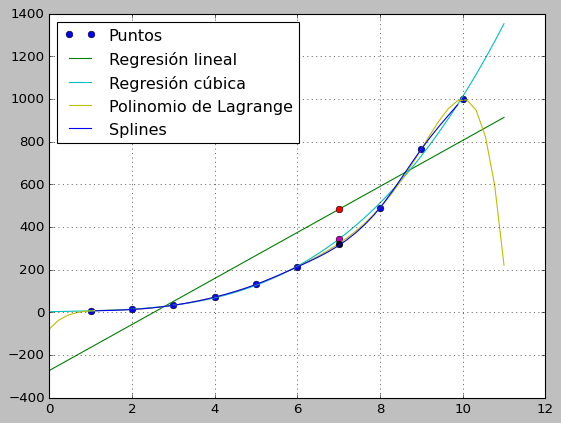

In [ ]:
t=np.linspace(0, 11,50)
plt.style.use('classic')
plt.plot(x,y, "o", label= "Puntos")
plt.plot(t, f(t,z), label= "Regresión lineal")
plt.plot(7, f(7,z), "o")
plt.plot(t, f2(t,z2), label= "Regresión cúbica")
plt.plot(7, f2(7,z2), "o")
plt.plot(t, lagrange(t, x, y), label= "Polinomio de Lagrange")
plt.plot(7, lagrange(7, x, y), "o")
plt.plot(t, [splines(i, X, Y, Segundas_Derivadas, n) for i in t ] , label= "Splines")
plt.plot(7, splines(7, X, Y, Segundas_Derivadas, n))
plt.legend(loc ="upper left")
plt.grid()
plt.show()

### Solución punto c.

La solución de este punto se presenta en la sección de Análisis/Conclusiones.

## Anexos.
A continuación se presentan desarrollos posteriores del tema, no usados en este reporte pero que están intímamente ligados con el tema y que nos permiten enfocar las conclusiones del tema global que se está viendo en clase.


### Splines Lineales.

Como su nombre lo indica, se hará la unión más simple entre dos puntos, una línea recta, sera funciones lineales de la siguiente forma:
$  S(x) = 
  \left \{
    \begin{aligned}
      f(x)=f(x_0)+m_o(x-x_0) &\quad& x_0<x<x_1 \\
      f(x)=f(x_1)+m_1(x-x_1) &\quad& x_1<x<x_2  \\
      f(x)=f(x_2)+m_2(x-x_2) &\quad& x_2<x<x_3 
    \end{aligned}
  \right .
$




Donde cada pendiente tiene la forma: 
$$m_i=\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i} $$
Esta es la pendiente de la función que une los dos puntos,  $(x_{i},x_{i+1})$.
Estas ecuaciones se pueden usar para evaluar la función en cualquier punto entre $x_0$ y $x_n$ localizando primero el intervalo dentro del cual está el punto. Después se usa la ecuación adecuada para determinar el valor de la función dentro del intervalo. El método es obviamente idéntico al de la interpolación lineal.


**Ejemplo**: Ajuste los datos de la tabla de datos de abajo con trazadores de primer grado, halle el valor de la función para x=5.

In [ ]:
df = pd.DataFrame()
df['x'] = [3.5,4.5,7.0,9.0]
df['f(x)'] = [2.5,1.0,2.5,0.5]

In [ ]:
df

,x,f(x)
0,3.5,2.5
1,4.5,1.0
2,7.0,2.5
3,9.0,0.5


Se utilizan los datos para determinar las pendientes entre los puntos. Por
ejemplo, en el intervalo de $x = 4.5$ a $x = 7$ la pendiente se calcula con la ecuación:
$$m=\frac{2.5-1}{7-4.5}=0.60 $$

Necesitamos una función que le entreguemos una serie de puntos. una lista de puntos $(x_i,y_i)$ y nos devuelva una lista de pendintes y una lista de funciones que estén definidas en esos intervalos.

In [ ]:
#Datos
xi=(3.5,4.5,7,9.0)
yi=(2.5,1.0,2.5,0.5)


In [ ]:
def SplinLin(xi,yi):
  n=len(xi)
  mi=[]
  for i in range(0,n-1,1):
    t=(yi[i+1]-yi[i])/(xi[i+1]-xi[i])
    mi.append(t)
  return mi

In [ ]:
SplinLin(xi,yi)

[-1.5, 0.6, -1.0]

Ahora, debemos crear las funciones con los valores de las pendientes que hemos realizado.

In [ ]:
#FUncion punto de corte
def SpliLinCorte(pendiente,xpoints,ypoints):
  n=len(xi)
  b=[]
  for i in range(0,n-1,1):
    t=-pendiente[i]*xpoints[i]+ypoints[i]
    b.append(t)
  return b

In [ ]:
SpliLinCorte(SplinLin(xi,yi),xi,yi)

[7.75, -1.6999999999999997, 9.5]

In [ ]:
#Función completa
#Se le ingresa un t, que es el cual va a ser evaluado.
def SplinLin(t,xi,yi):
  n=len(xi)
  mi=[]
  b=[]
  for i in range(0,n-1,1):
    t1=(yi[i+1]-yi[i])/(xi[i+1]-xi[i])
    mi.append(t1)
    t2=-mi[i]*xi[i]+yi[i]
    b.append(t2)
  for j in range(0,n-1,1):
    if (t>=xi[j]) and (t<=xi[j+1]):
      return t*mi[j] + b[j]
      break
    else:
      continue

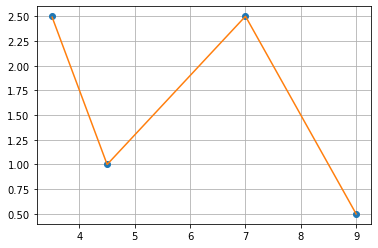

In [ ]:
#Graficacion.
t= np.linspace(1,9,1000)
plt.plot(xi,yi,'o')
plt.plot(t,[SplinLin(j,xi,yi) for j in t] ,"-")
plt.grid()
plt.show()

##Análisis/ Conclusiones:





Lo primeor que podemos decir sobre nuestros datos es de manera cualitativa, al observar la graficada generada, vemos que la regresión lineal es la aproximación que más se aleja de nuestros datos. Esto debido a que los datos entregados para el análisis no tienen un comportamiento lineal y es natural esperar que no se ajusten bien estos datos a la recta.

Así como habíamos visto de manera teorica, todos los polinomios creados, tanto de lagrange como de newton(aunque no graficado en este ejemplo), tienen la particularidad (por definición) de pasar por todos los puntos, e incluso (al menos visualmente) podemos ver que estos polinomios tienen buen entre los puntos, dando una buena aproximación al comportamiento real que había obtenido.

Por otra parte, no todo es lo mejor con los polinomios de lagrange, porque en los extremos, debido a como esta construido el polinomio de lagrange, vemos que si comportamiento es cesgado frente al comportamiento de los datos, es decir, este método no sirve para realizar extrapolaciones fuera de los límites de datos entregados.

De la misma manera, los spliner cubicos, pasan por todos los puntos, es algo que imponemos por definición, al menos visualmente, también podemos decir que tiene buen comportamiento entre punto y punto, recordardo que entre cada punto (como se explicó en la teoria) se realiza una conexión por polinomios de grado 3. Ahora, a diferencia de los polinomio de lagrange, no es que tengamos un comportamiento feo o que no se ajuste a los datos antes o después de los límites otorgados. Simplemente, por definición de splin, no podemos obtener información externa sobre nuestros datos, todo lo que podemos hallar es de manera internar

Por último pero no menos importante, tenemos la regresión cúbica, que en algunos puntos se aproxima muy bien al comportamiento de cada punto, mientras en algunos pocos podemos ver una ligera desviación. Este es el mejor método de aproximación para estos datos, no por que nos ayuda a obtener información interna sobre los datos, sino, porque es el que mejor se ajusta a los datos de manera externa. Este método además de permitirnos intrapolar de buena manera, podemos extrapolar adecuadamente con nuestros datos.

#**Rerencias**

---



*   Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers (Vol. 1221). New York: Mcgraw-hill.
*   Michael T. Heath (2002). EScientific Computing: An Introductory Survey [Diapositiva de PowerPoint]. Department of Computer Science
University of Illinois at Urbana-Champaign.
*   Heath, M. T. (2018). Scientific computing: an introductory survey, revised second edition. Society for Industrial and Applied Mathematics.
*   Whitehorn, N., van Santen, J., & Lafebre, S. (2013). Penalized splines for smooth representation of high-dimensional Monte Carlo datasets. Computer Physics Communications, 184(9), 2214-2220.
*   Python, W. (2021). Python. Python Releases for Windows, 24.
*   Montiel, G., & Cantoral, R. (2003). Una presentación visual del polinomio de Lagrange. Números. Revista de Didáctica de las Matemáticas, 55, 3-22.